In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
# from importlib import reload
# import vehicles
# import game
# import agents
# import evaluation
# import models
# reload(vehicles)
# reload(game)
# reload(agents)
# reload(evaluation)
# reload(models)
# import torch

In [3]:
import random
random.seed(42)
import torch
torch.manual_seed(42)

In [4]:
from agents import BasicAttackerAgent, PassiveAgent, WolpertingerDefenderAgent
from evaluation import Evaluator
from game import GameConfig
from models import StateShapeData
from vehicles import JsonVehicleProvider, Vehicle, Vulnerability

vehicle_provider=JsonVehicleProvider("../subgame/python/solutions.json")
game_config=GameConfig(
    max_vehicles=30,
    cycle_every=3,
    cycle_num=5,
    cycle_allow_platoon=False
)

# attacker=BasicAttackerAgent(1)
attacker = PassiveAgent()
defender=WolpertingerDefenderAgent(
    state_shape_data=StateShapeData(
        num_vehicles=game_config.max_vehicles,
        num_vehicle_features=Vehicle.get_shape()[0],
        num_vulns=vehicle_provider.max_vulns,
        num_vuln_features=Vulnerability.get_shape()[0]
    )
)

engine = Evaluator(
    vehicle_provider=vehicle_provider,
    game_config=game_config,
    num_rounds=1000
)
engine.reset()

c:\Users\TeamD\.conda\envs\subgame\lib\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [40]:
from training import WolpertingerDefenderAgentTrainer
trainer = WolpertingerDefenderAgentTrainer(
    batch_size=100,
)

In [42]:
stats_history = trainer.train(
    episodes=50,
    max_steps_per_episode=15,
    defender_agent=defender,
    attacker_agent=attacker,
    warmup=100,
    evaluator=engine,
)

In [35]:
import math
trainer.eps_end + (trainer.eps_start - trainer.eps_end) * math.exp(-1. * trainer.steps_done / trainer.eps_decay)

0.45151156982986246

In [39]:
from models import DefenderActionTensorBatch


a = defender.get_action(engine.game.state)
state = engine.game.state.as_tensors(defender.state_shape_data)
print("state", state.vehicles.shape, state.vulnerabilities.shape)
action = a.as_tensor(defender.state_shape_data)

print("action", action.members.shape, action.monitor.shape)
print(action)
q_values = defender.critic(state,action) 
print("q", q_values)
print("actual", defender.get_utility(defender.take_action(engine.game.state, a)))


state torch.Size([1, 30, 2]) torch.Size([1, 30, 7, 4])
action torch.Size([1, 1, 30]) torch.Size([1, 1, 30])
DefenderActionTensorBatch(members=tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]]), monitor=tensor([[[1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
          0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.]]]))
q tensor([[327.9882]], grad_fn=<ReshapeAliasBackward0>)
actual 30


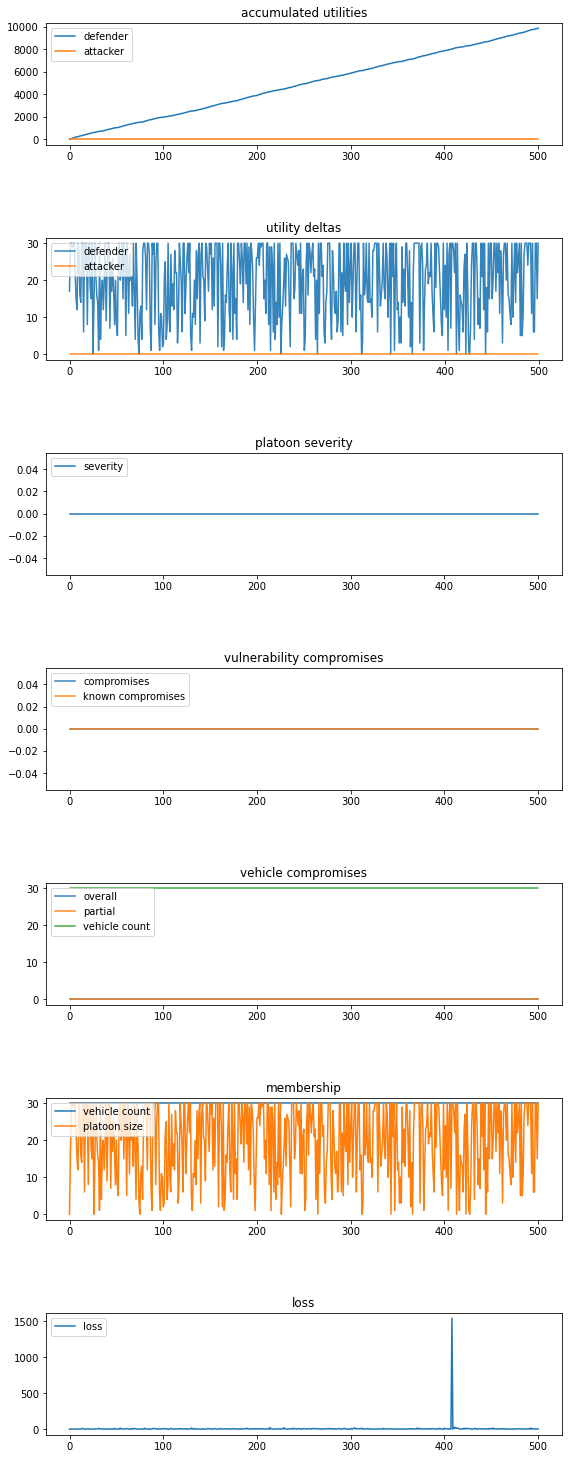

In [8]:
engine.plot(stats_history[0])

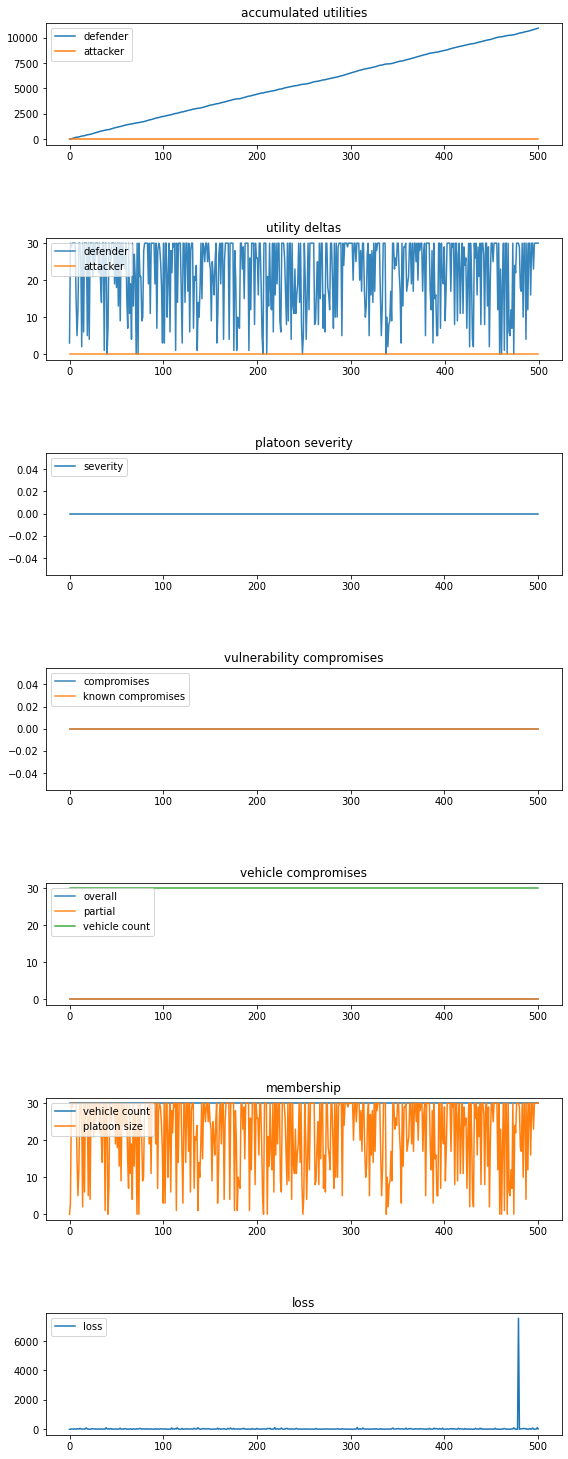

In [18]:
engine.plot(stats_history[-1])